In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from PIL import Image

In [7]:
np.random.seed(2017) # random seed for repeatability

n_points = 30 # the number of points we randomly generate

X = np.sort(np.random.rand(n_points)) # create a few random X values (uniform dist)
Y = 15*np.sin(X*np.pi*2) + np.random.randn(n_points) 
##### create the corresponding Y's, generated from a sine and perturbed with gaussian noise (ie: generator function)

X_plot = np.linspace(np.min(X),np.max(X),100)[:,np.newaxis] # create a set of evenly spaced Xs
Y_actual = 15*np.sin(X_plot*2*np.pi) # also do a plot of the actual generator function

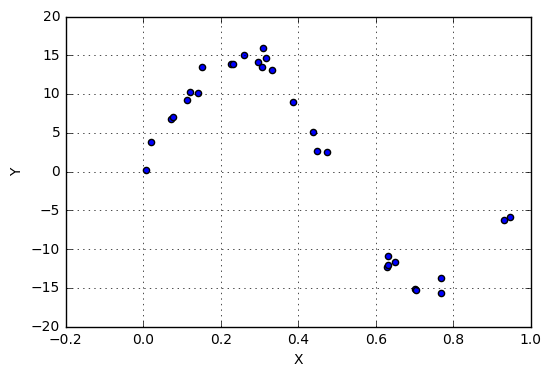

In [30]:
plt.scatter(X,Y)
#plt.plot(X_plot,Y_actual)
plt.grid()
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [36]:
poly = 1 # degree polynomial we are trying to fit with (ie: complexity)

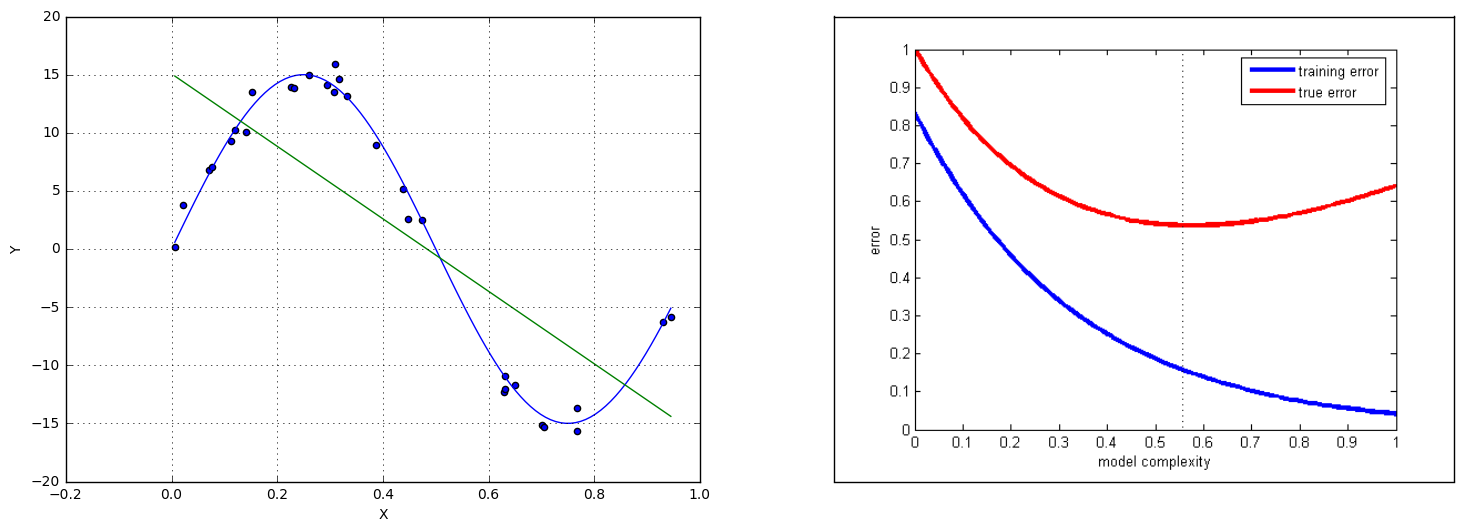

In [37]:
featgen = PolynomialFeatures(poly, include_bias=False) # generate the nth polynomial feature fitter as determined above
X_feat = featgen.fit_transform(X[:,np.newaxis]) # create those features

curve = Image.open('bias variance curve.png') # open the bias variance curve

linmod = LinearRegression() # instantiate the linear regression modeller
linmod.fit(X_feat,Y) # fit the model to the data

X_plot_poly = featgen.fit_transform(X_plot) # create the polynomial features of these evenly spaced Xs
Y_plot = linmod.predict(X_plot_poly) # with our trained model, plot the resulting 'guess' of the generator function

plt.figure(figsize=(18,6))
plt.subplot(121)
plt.plot(X_plot,Y_actual)
plt.plot(X_plot,Y_plot)
plt.scatter(X,Y)
plt.xlabel('X')
plt.ylabel('Y')
plt.grid()

plt.subplot(122)
plt.imshow(curve)
plt.xticks([])
plt.yticks([])

plt.show()